# Explore U4ea data 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import datetime
from dateutil.relativedelta import relativedelta

In [2]:
data_file = 'merged.csv'

df = pd.read_csv(data_file, index_col=None)

In [3]:
df

,sessionTimestamp,appVersion,sessionDuration,carrier,deviceIdentifiers,deviceModel,deviceSubModel,countryISO,eventName,eventOffset,eventParameters,userId,gender,birthYear,latitude,longitude,sessionProperties,firstSessionTimestamp,userProperties,None
0,1593913451141,11,9731,NaN,"{""idfv"":""F81B6DDA-092A-41E5-8259-5A2C01EEDD69""}",iPhone XS,"iPhone11,2",US,NaN,NaN,{},NaN,Unknown,NaN,NaN,NaN,{},1593913451141,[],NaN
1,1594876751016,11,3796,mediacom communications corp,"{""idfv"":""F1AD4C82-D356-475A-AD5F-ABA60F2A0B59""}",iPhone 7 Plus,"iPhone9,2",US,NaN,NaN,{},NaN,Unknown,NaN,NaN,NaN,{},1571341662948,[],NaN
2,1595356374996,11,303842,charter communications,"{""idfv"":""D4B4A629-85A0-4F2E-B36E-10153D01C43E""}",iPhone 11 Pro,"iPhone12,3",US,NaN,NaN,{},NaN,Unknown,NaN,NaN,NaN,{},1588784214844,[],NaN
3,1594748395281,11,32074,charter communications,"{""idfv"":""D4B4A629-85A0-4F2E-B36E-10153D01C43E""}",iPhone 11 Pro,"iPhone12,3",US,NaN,NaN,{},NaN,Unknown,NaN,NaN,NaN,{},1588784214844,[],NaN
4,1595747935873,11,141595,NaN,"{""idfv"":""D4B4A629-85A0-4F2E-B36E-10153D01C43E""}",iPhone 11 Pro,"iPhone12,3",US,NaN,NaN,{},NaN,Unknown,NaN,NaN,NaN,{},1588784214844,[],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223072,1508615743551,11,2301,NaN,"{""idfv"":""1074A8D7-3E67-44EB-980F-0FED89125A9C""}",iPhone 7 Plus,"iPhone9,2",US,NaN,NaN,{},NaN,Unknown,NaN,0.0,0.0,{},1508615647666,[],NaN
223073,1508615647666,11,76752,NaN,"{""idfv"":""1074A8D7-3E67-44EB-980F-0FED89125A9C""}",iPhone 7 Plus,"iPhone9,2",US,NaN,NaN,{},NaN,Unknown,NaN,0.0,0.0,{},1508615647666,[],NaN
223074,1508279926644,11,203,apple inc.,"{""idfv"":""B32A3B94-4A66-48E7-A2B5-4182577F7CA0""}",iPad Air 2 - Cellular,"iPad5,4",US,NaN,NaN,{},NaN,Unknown,NaN,0.0,0.0,{},1508279926644,[],NaN
223075,1509142336739,11,53308,NaN,"{""idfv"":""A8D8A5E8-4A27-476B-AC78-13E8DF7454DB""}",iPhone SE,"iPhone8,4",US,NaN,NaN,{},NaN,Unknown,NaN,0.0,0.0,{},1509141090642,[],NaN


In [4]:
Counter(df['appVersion'])

Counter({11: 223076, 9: 1})

In [5]:
Counter(df['deviceModel']).most_common(10)

[('iPhone 6s', 26679),
 ('iPhone 7', 21653),
 ('iPhone X', 20062),
 ('iPhone 8 Plus', 17489),
 ('iPhone 7 Plus', 16737),
 ('iPhone 8', 15046),
 ('iPhone 6', 13117),
 ('iPhone SE', 9677),
 ('iPhone 6s Plus', 8842),
 ('iPhone XR', 8680)]

In [6]:
Counter(df['carrier']).most_common(10)

[(nan, 71506),
 ('charter communications', 10009),
 ('comcast cable communications inc.', 8338),
 ('centurytel internet holdings inc.', 6683),
 ('time warner cable internet llc', 5263),
 ('att internet services', 4420),
 ('mci communications services inc. dba verizon business', 3811),
 ('embarq corporation', 3622),
 ('att mobility llc', 3388),
 ('cox communications inc.', 2634)]

In [9]:
Counter(df['countryISO']).most_common(20)

[('US', 141494),
 ('CA', 11343),
 ('GB', 6240),
 ('TH', 5971),
 ('AU', 5079),
 ('BR', 5042),
 ('IN', 2790),
 ('KR', 2261),
 ('NL', 2229),
 ('FR', 2157),
 ('DE', 1943),
 ('PH', 1643),
 ('JP', 1600),
 ('RU', 1548),
 ('MX', 1542),
 ('IT', 1357),
 ('UY', 1324),
 ('ES', 1262),
 ('TR', 1204),
 ('ID', 1178)]

`birthYear`, `gender`, `userId`, `latitude`, `longitude`, `userProperties`, `sessionProperties` are all NaN or 0

In [22]:
Counter(df['eventName']).most_common()

[(nan, 200057), ('Feedback', 22820), ('uncaught', 200)]

not sure what `eventOffset` is...time it took to initiate event from opening app?

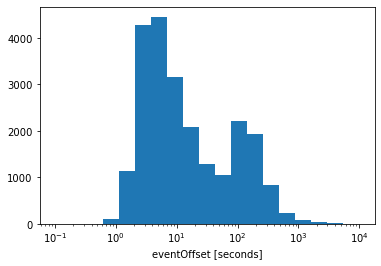

In [29]:
plt.hist(df['eventOffset'][df['eventOffset']>0]/1000, bins=np.logspace(-1,4,20))
plt.semilogx()
plt.xlabel('eventOffset [seconds]')
plt.show()

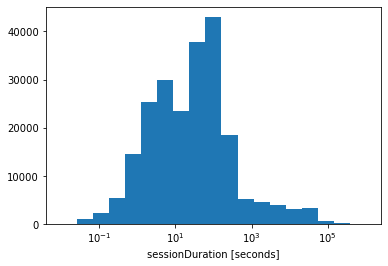

In [31]:
plt.hist(df['sessionDuration'][df['sessionDuration']>0]/1000, bins=np.logspace(-2,6,20))
plt.semilogx()
plt.xlabel('sessionDuration [seconds]')
plt.show()

A 13 digit timestamp is used in JavaScript to represent time in milliseconds.

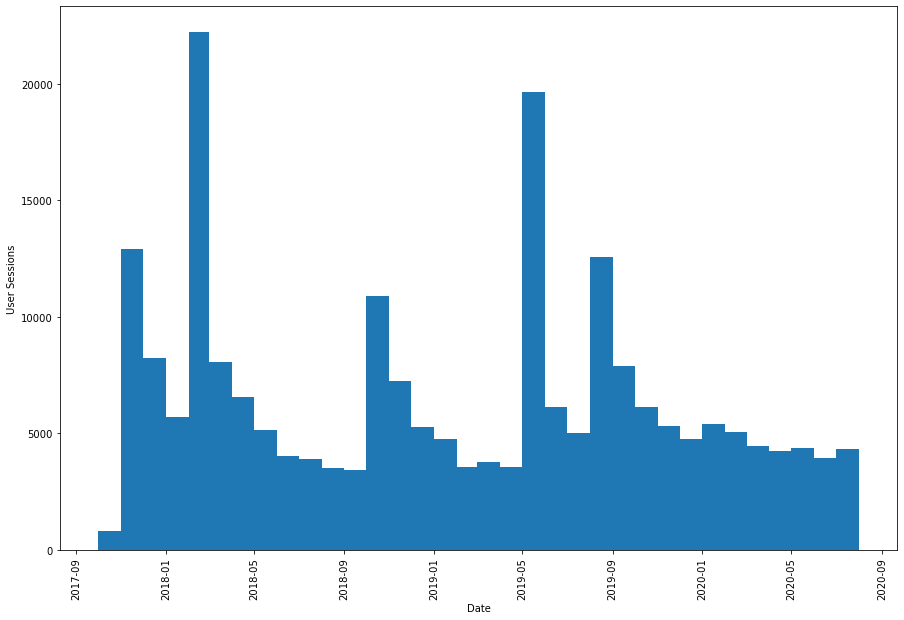

In [48]:
plt.figure(figsize=[15,10])
plt.hist([datetime.datetime.fromtimestamp(timestamp/1000) for timestamp in df['sessionTimestamp']],
         bins=[datetime.datetime(2017, 10, 1)+ relativedelta(months=+x) for x in range(35)])
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('User Sessions')
plt.show()

# User profiles 

In [7]:
Counter(df['eventParameters']).most_common(10)

[('{}', 200257),
 ('{"And Boost My":"Vigor","While I":"Meditate","I Want To Feel":"Grounded","Feedback":"Positive","Beat Duration":"00:10:12"}',
  12),
 ('{"And Boost My":"Vigor","While I":"Meditate","I Want To Feel":"Grounded","Feedback":"Positive","Beat Duration":"00:10:13"}',
  5),
 ('{"And Boost My":"Vigor","While I":"Meditate","I Want To Feel":"Grounded","Feedback":"Positive","Beat Duration":"00:10:11"}',
  5),
 ('{"And Boost My":"Vigor","While I":"Meditate","I Want To Feel":"Grounded","Feedback":"Positive","Beat Duration":"00:10:09"}',
  5),
 ('{"And Boost My":"Vigor","While I":"Meditate","I Want To Feel":"Grounded","Feedback":"Positive","Beat Duration":"00:10:10"}',
  5),
 ('{"And Boost My":"Will Power","While I":"Meditate","I Want To Feel":"Composure","Feedback":"Positive","Beat Duration":"00:20:21"}',
  4),
 ('{"And Boost My":"Vigor","While I":"Meditate","I Want To Feel":"Grounded","Feedback":"Positive","Beat Duration":"00:10:14"}',
  4),
 ('{"And Boost My":"Creativity","While

In [10]:
#events actually recorded
df_events = df[df['eventParameters']!="{}"]

In [21]:
df_events.loc[:,'boostMy'] = [eval(event)['And Boost My'] for event in df_events['eventParameters']]
df_events.loc[:,'whileI'] = [eval(event)['While I'] for event in df_events['eventParameters']]
df_events.loc[:,'IWantToFeel'] = [eval(event)['I Want To Feel'] for event in df_events['eventParameters']]
df_events.loc[:,'feedback'] = [eval(event)['Feedback'] for event in df_events['eventParameters']]
df_events.loc[:,'beatDuration'] = [eval(event)['Beat Duration'] for event in df_events['eventParameters']]

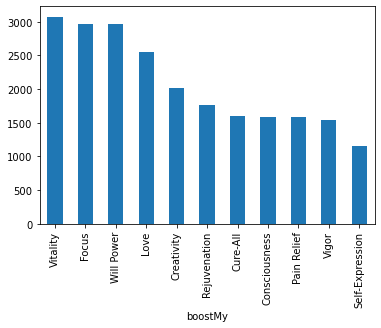

In [79]:
df_events.groupby('boostMy').size().sort_values(ascending=False).plot(kind='bar')

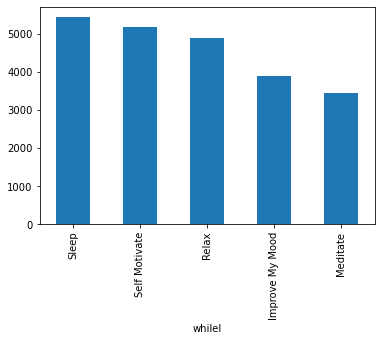

In [80]:
df_events.groupby('whileI').size().sort_values(ascending=False).plot(kind='bar')

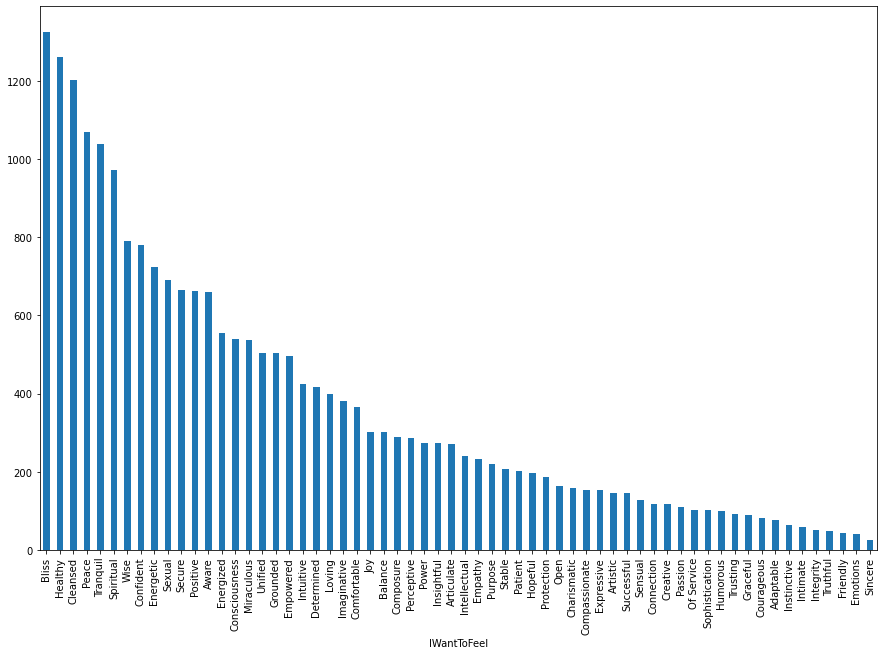

In [82]:
plt.figure(figsize=[15,10])
df_events.groupby('IWantToFeel').size().sort_values(ascending=False).plot(kind='bar')

Feedback: whether or not the user found it helpful

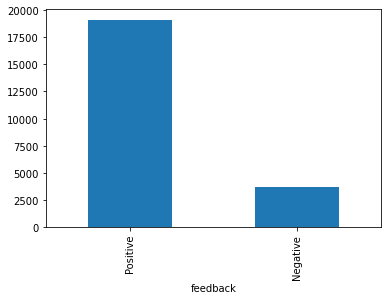

In [83]:
df_events.groupby('feedback').size().sort_values(ascending=False).plot(kind='bar')

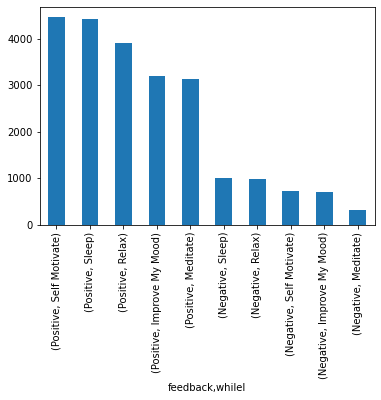

In [116]:
df_events.groupby(['feedback', 'whileI']).size().sort_values(ascending=False).plot(kind='bar')

In [26]:
def get_sec(time_str):
    """Get Seconds from time."""
    h, m, s = time_str.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

In [28]:
df_events.loc[:,'beatDuration_seconds']= [get_sec(beat) for beat in df_events['beatDuration'].values]

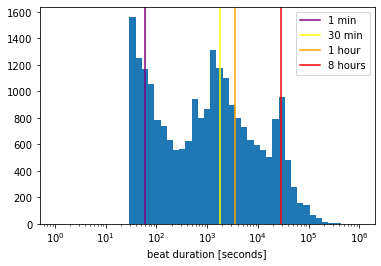

In [112]:
plt.hist(df_events['beatDuration_seconds'], bins=np.logspace(0,6,50))
plt.axvline(60, c='purple', label='1 min')
plt.axvline(3600/2, c='yellow', label='30 min')
plt.axvline(3600, c='orange', label='1 hour')
plt.axvline(3600*8, c='red', label='8 hours')
plt.semilogx()
plt.xlabel('beat duration [seconds]')
plt.legend()
plt.show()

3 distinct usage times: ~8 hours, ~30min, <1min

In [29]:
min(df_events['beatDuration_seconds'])

30

sharp cutoff at 30s might be that an event is not registered unless it is at least 30s long

## Use only events with positive feedback 

In [30]:
positive_df_events=df_events[df_events['feedback']=='Positive']

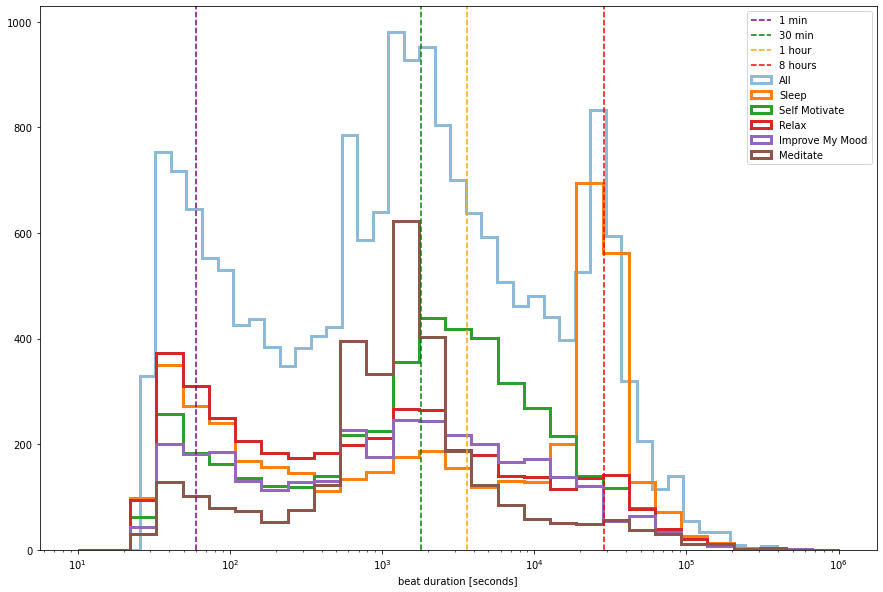

In [32]:
plt.figure(figsize=[15,10])
plt.hist(positive_df_events['beatDuration_seconds'],
         bins=np.logspace(1,6,50), alpha=0.5, label='All', histtype='step', linewidth = 3)
plt.hist(positive_df_events[positive_df_events['whileI']=='Sleep']['beatDuration_seconds'],
         bins=np.logspace(1,6,30), alpha=1, label='Sleep', histtype='step', linewidth = 3)
plt.hist(positive_df_events[positive_df_events['whileI']=='Self Motivate']['beatDuration_seconds'],
         bins=np.logspace(1,6,30), alpha=1, label='Self Motivate', histtype='step', linewidth = 3)
plt.hist(positive_df_events[positive_df_events['whileI']=='Relax']['beatDuration_seconds'],
         bins=np.logspace(1,6,30), alpha=1, label='Relax', histtype='step', linewidth = 3)
plt.hist(positive_df_events[positive_df_events['whileI']=='Improve My Mood']['beatDuration_seconds'],
         bins=np.logspace(1,6,30), alpha=1, label='Improve My Mood', histtype='step', linewidth = 3)
plt.hist(positive_df_events[positive_df_events['whileI']=='Meditate']['beatDuration_seconds'],
         bins=np.logspace(1,6,30), alpha=1, label='Meditate', histtype='step', linewidth = 3)
plt.axvline(60, c='purple', label='1 min', linestyle='--')
plt.axvline(3600/2, c='green', label='30 min', linestyle='--')
plt.axvline(3600, c='orange', label='1 hour', linestyle='--')
plt.axvline(3600*8, c='red', label='8 hours', linestyle='--')
plt.semilogx()
plt.xlabel('beat duration [seconds]')
plt.legend()
plt.show()

sleep, self-motivate, and meditate are clearly 3 distinct uses

### which combinations are most popular?

In [130]:
positive_df_events.groupby(['boostMy','whileI', 'IWantToFeel']).size().sort_values(ascending=False).reset_index().rename(columns={0:'count'})


,boostMy,whileI,IWantToFeel,count
0,Cure-All,Sleep,Healthy,127
1,Will Power,Self Motivate,Confident,101
2,Vigor,Self Motivate,Energetic,97
3,Rejuvenation,Sleep,Tranquil,96
4,Focus,Self Motivate,Intuitive,94
...,...,...,...,...
2770,Vigor,Sleep,Charismatic,1
2771,Vigor,Sleep,Compassionate,1
2772,Pain Relief,Relax,Determined,1
2773,Pain Relief,Relax,Empowered,1


In [35]:
combo_counts = positive_df_events.groupby(['boostMy','whileI']).size().sort_values(ascending=False).reset_index().rename(columns={0:'count'})
combo_counts

,boostMy,whileI,count
0,Focus,Self Motivate,1060
1,Will Power,Self Motivate,831
2,Rejuvenation,Sleep,702
3,Vitality,Relax,563
4,Love,Sleep,562
5,Vitality,Improve My Mood,548
6,Cure-All,Sleep,531
7,Love,Relax,524
8,Will Power,Sleep,500
9,Vigor,Self Motivate,480


In [36]:
#get quartile indices
total = 0
percentile_indices = []
percentile = .25
for i, frac in enumerate(combo_counts['count']/np.sum(combo_counts['count'])):
    total+=frac
    if total > percentile:
        percentile_indices.append(i-1)
        percentile+=.25

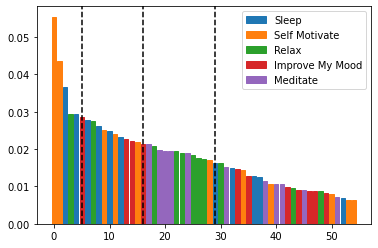

In [166]:
import matplotlib.patches as mpatches
prop_cycle = plt.rcParams['axes.prop_cycle']
color = prop_cycle.by_key()['color']
colors = {'Sleep':color[0], 'Self Motivate':color[1], 'Relax':color[2], 'Improve My Mood':color[3], 'Meditate':color[4]}

barlist=plt.bar(range(55),combo_counts['count']/np.sum(combo_counts['count']))
for index in percentile_indices[:-1]:
    plt.axvline(index, linestyle='--', color ='k')

for i in range(55):
    whileI =  combo_counts.iloc[i]['whileI'] 
    barlist[i].set_color(colors[whileI])

handles = [mpatches.Patch(color=v, label=k) for k,v in colors.items()]
plt.legend(handles=handles)
plt.show()

vertical lines show 25, 50, 75 percent of events.

most common events are for `self motivate` and `sleep`. 3rd quartile is almost exclusively `meditate` and `relax`

### what do the top users do

In [249]:
print('{0} unique users in {1} event recordings'.format(len(set(df_events['deviceIdentifiers'])), len(df_events)))
tot = 0
q1_ids = []
q2_ids = []
q3_ids = []
q4_ids = []
print('Top users accounting for 25% of events:')
for i, count in enumerate(Counter(df_events['deviceIdentifiers']).most_common()):
    tot+=count[1]/len(df_events)
    if tot<0.25:
        q1_ids.append(count[0])
    elif tot<0.5:
        q2_ids.append(count[0])
    elif tot<0.75:
        q3_ids.append(count[0])
    else:
        q4_ids.append(count[0])
    if tot<0.25:
        print('user {0}; events: {1}; fraction of total: {2}; cumulative count {3}'.format(i,count[1],count[1]/len(df_events),tot))

6154 unique users in 22820 event recordings
Top users accounting for 25% of events:
user 0; events: 1302; fraction of total: 0.05705521472392638; cumulative count 0.05705521472392638
user 1; events: 530; fraction of total: 0.02322524101665206; cumulative count 0.08028045574057843
user 2; events: 468; fraction of total: 0.02050832602979842; cumulative count 0.10078878177037685
user 3; events: 443; fraction of total: 0.019412795793163892; cumulative count 0.12020157756354075
user 4; events: 428; fraction of total: 0.018755477651183173; cumulative count 0.13895705521472393
user 5; events: 310; fraction of total: 0.013584574934268186; cumulative count 0.1525416301489921
user 6; events: 273; fraction of total: 0.01196319018404908; cumulative count 0.1645048203330412
user 7; events: 228; fraction of total: 0.009991235758106924; cumulative count 0.17449605609114813
user 8; events: 219; fraction of total: 0.009596844872918493; cumulative count 0.1840929009640666
user 9; events: 188; fraction o

In [253]:
q1_user_df = df_events[[event in q1_ids for event in df_events['deviceIdentifiers']]]
q2_user_df = df_events[[event in q2_ids for event in df_events['deviceIdentifiers']]]
q3_user_df = df_events[[event in q3_ids for event in df_events['deviceIdentifiers']]]
q4_user_df = df_events[[event in q4_ids for event in df_events['deviceIdentifiers']]]

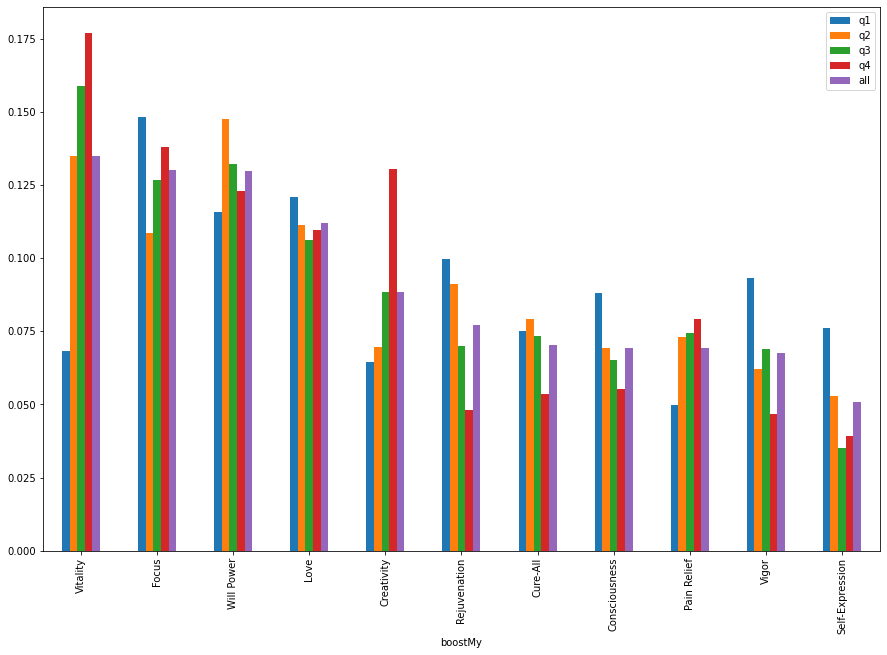

In [273]:
boostMy_df = pd.DataFrame({'q1':q1_user_df.groupby('boostMy').size()/sum(q1_user_df.groupby('boostMy').size()),
          'q2':q2_user_df.groupby('boostMy').size()/sum(q2_user_df.groupby('boostMy').size()),
          'q3':q3_user_df.groupby('boostMy').size()/sum(q3_user_df.groupby('boostMy').size()),
          'q4':q4_user_df.groupby('boostMy').size()/sum(q4_user_df.groupby('boostMy').size()),
          'all':df_events.groupby('boostMy').size()/sum(df_events.groupby('boostMy').size())
          })
boostMy_df.sort_values(by = 'all',ascending=False).plot(kind='bar', figsize=[15,10])
plt.show()

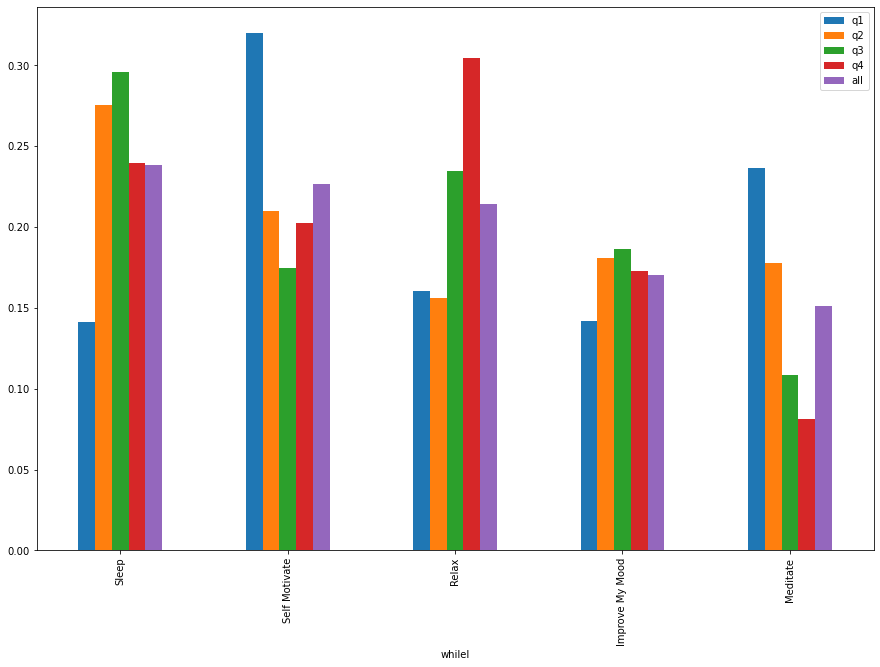

In [274]:
boostMy_df = pd.DataFrame({'q1':q1_user_df.groupby('whileI').size()/sum(q1_user_df.groupby('whileI').size()),
          'q2':q2_user_df.groupby('whileI').size()/sum(q2_user_df.groupby('whileI').size()),
          'q3':q3_user_df.groupby('whileI').size()/sum(q3_user_df.groupby('whileI').size()),
          'q4':q4_user_df.groupby('whileI').size()/sum(q4_user_df.groupby('whileI').size()),
          'all':df_events.groupby('whileI').size()/sum(df_events.groupby('whileI').size())
          })
boostMy_df.sort_values(by = 'all',ascending=False).plot(kind='bar', figsize=[15,10])
plt.show()

top users use app to `self-motivate` and `meditate`, depite the overall top use being `sleep`

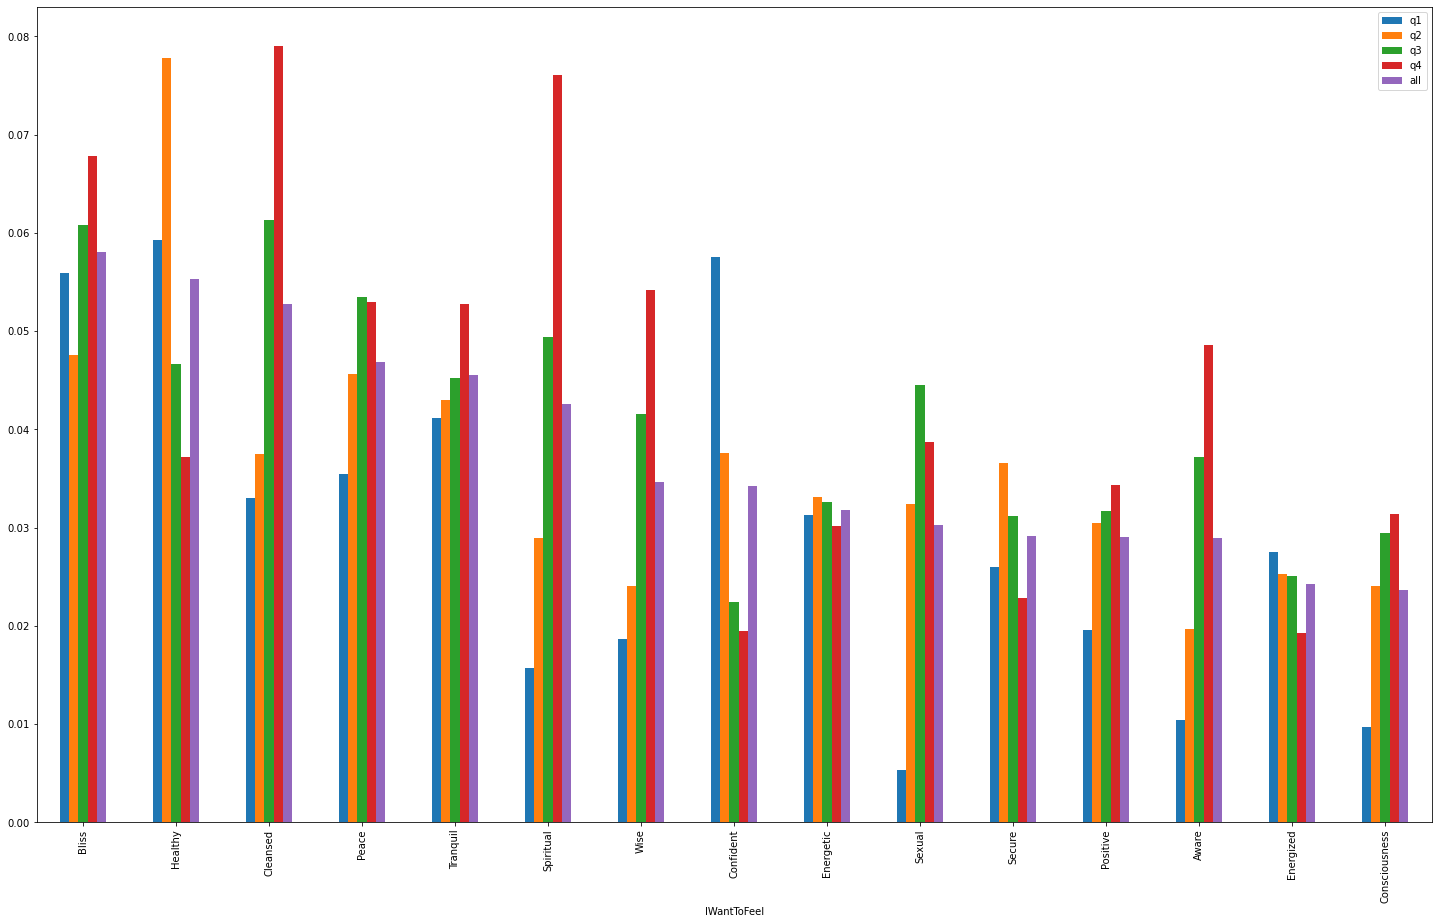

In [278]:
boostMy_df = pd.DataFrame({'q1':q1_user_df.groupby('IWantToFeel').size()/sum(q1_user_df.groupby('IWantToFeel').size()),
          'q2':q2_user_df.groupby('IWantToFeel').size()/sum(q2_user_df.groupby('IWantToFeel').size()),
          'q3':q3_user_df.groupby('IWantToFeel').size()/sum(q3_user_df.groupby('IWantToFeel').size()),
          'q4':q4_user_df.groupby('IWantToFeel').size()/sum(q4_user_df.groupby('IWantToFeel').size()),
          'all':df_events.groupby('IWantToFeel').size()/sum(df_events.groupby('IWantToFeel').size())
          })
boostMy_df.sort_values(by = 'all',ascending=False)[:15].plot(kind='bar', figsize=[25,15])
plt.show()

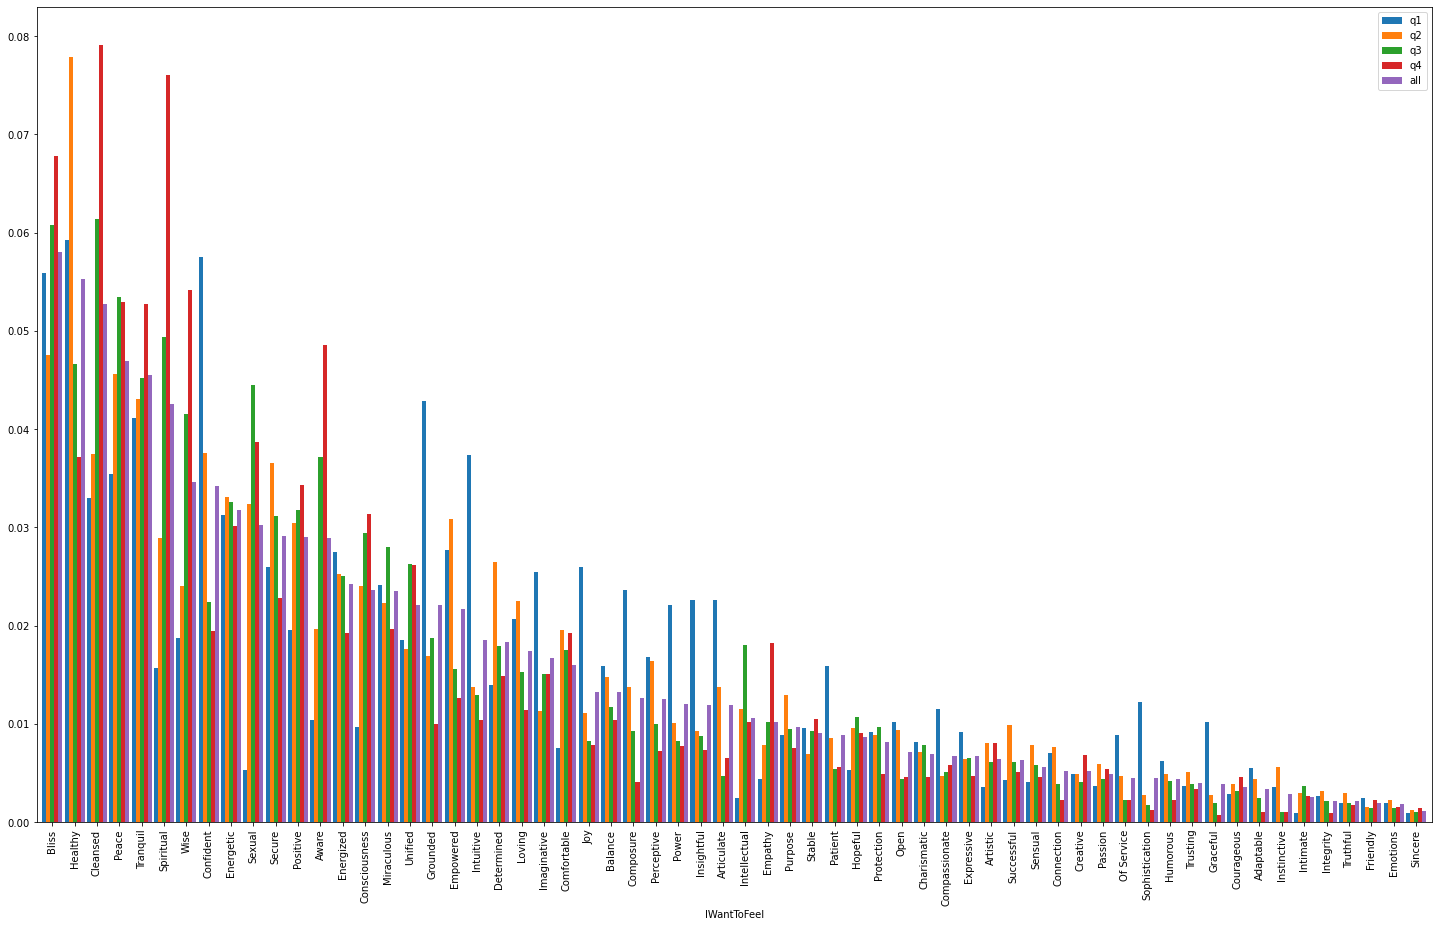

In [286]:
boostMy_df = pd.DataFrame({'q1':q1_user_df.groupby('IWantToFeel').size()/sum(q1_user_df.groupby('IWantToFeel').size()),
          'q2':q2_user_df.groupby('IWantToFeel').size()/sum(q2_user_df.groupby('IWantToFeel').size()),
          'q3':q3_user_df.groupby('IWantToFeel').size()/sum(q3_user_df.groupby('IWantToFeel').size()),
          'q4':q4_user_df.groupby('IWantToFeel').size()/sum(q4_user_df.groupby('IWantToFeel').size()),
          'all':df_events.groupby('IWantToFeel').size()/sum(df_events.groupby('IWantToFeel').size())
          })
boostMy_df.sort_values(by = 'all',ascending=False).plot(kind='bar', figsize=[25,15], width=0.9)
plt.show()

it is interesting that certain words are much more common in top users: `confident`, `grounded`,`intuitive`,`imaginative`,`joy`, `composure`, `power`, `insightful`, `articulate`, `patient`, `compassionate`, `sophistication`, `graceful`

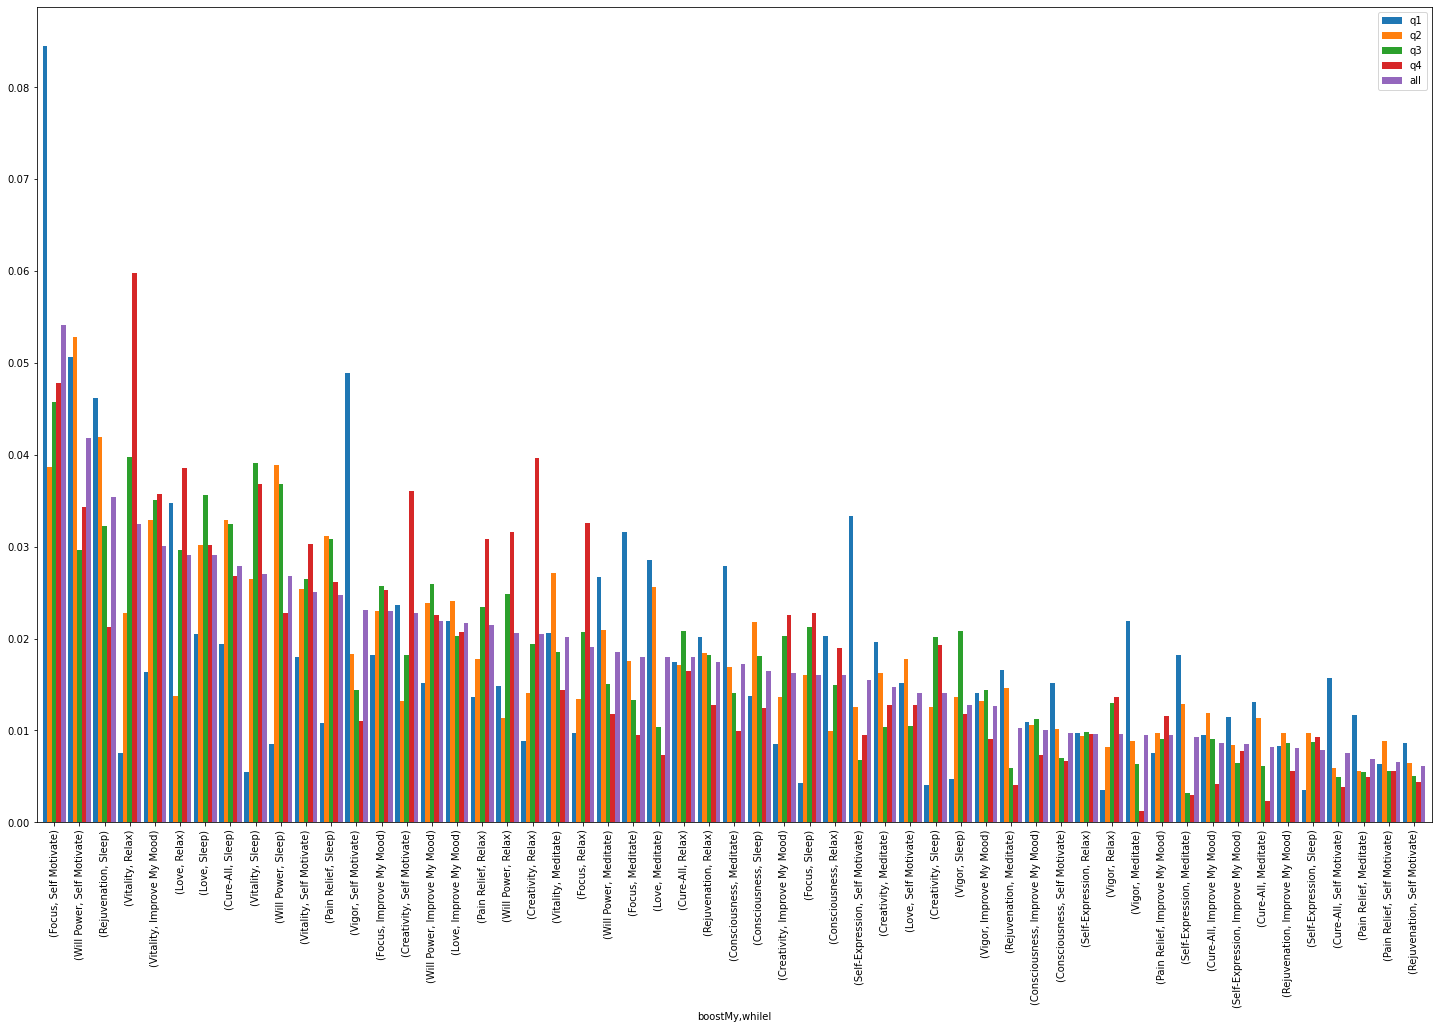

In [287]:
combo_df = pd.DataFrame({'q1':q1_user_df.groupby(['boostMy','whileI']).size()/sum(q1_user_df.groupby(['boostMy','whileI']).size()),
          'q2':q2_user_df.groupby(['boostMy','whileI']).size()/sum(q2_user_df.groupby(['boostMy','whileI']).size()),
          'q3':q3_user_df.groupby(['boostMy','whileI']).size()/sum(q3_user_df.groupby(['boostMy','whileI']).size()),
          'q4':q4_user_df.groupby(['boostMy','whileI']).size()/sum(q4_user_df.groupby(['boostMy','whileI']).size()),
          'all':df_events.groupby(['boostMy','whileI']).size()/sum(df_events.groupby(['boostMy','whileI']).size())
          })

combo_df.sort_values(by = 'all',ascending=False).plot(kind='bar', figsize=[25,15], width=0.9)

certain combinations are distinctly used more by top users: `self motivate: focus`, `self motivate: vigor`, `meditate: focus`, `meditate: consciousness`, `self motivate: self-expression`, `meditate: vigor`, `meditate: self-expression`

# Potential next steps:
- limit to only users who have used it a certain number of times
- compare positive and negative feedback in these events
- limit to beat durations above some limit (5min?)